In [133]:
import plotly.graph_objects as go
import networkx as nx

# reading input log file

# test_name = "arldm_chunk2k4c_ssd"
# test_name = "vist_1t"
# test_name = "vist_1t_chunk"
# test_name = "seq9f9s"
test_name = "s9f9p8"
# test_name = "ddmd_skipsim"
# test_name = "seq9f9s"
# test_name = "f48s9p24_1"

stat_path=f"example_stat/{test_name}"
image_path=f"{stat_path}/images"

VFD_ACCESS_SKIP=5

ADD_ADDR=False

STAGE_START = 0
STAGE_END = 9

VFD_IO_SKIP=10
DRAW_GRAPH=True

In [134]:
# My utility functions
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vfd_stat2graph as vfd2g
import utils.vfd_graph2sankey as vfd2sk

# Improve Functions
## TODO
- Add dataset nodes
- Add file address ordering nodes


In [135]:



TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS


STAGE_END is not in TASK_ORDER_LIST, set to max order: 8
TASK_ORDER_LIST = {'run_idfeature': 0, 'run_tracksingle': 1, 'run_gettracks': 2, 'run_trackstats': 3, 'run_identifymcs': 4, 'run_matchpf': 5, 'run_robustmcs': 6, 'run_mapfeature': 7, 'run_speed': 8}


['run_idfeature',
 'run_tracksingle',
 'run_gettracks',
 'run_trackstats',
 'run_identifymcs',
 'run_matchpf',
 'run_robustmcs',
 'run_mapfeature',
 'run_speed']

In [136]:
vfd_files = sload.find_files_with_pattern(stat_path, "vfd")
# vfd_files = vfd_files[0:1]
print(vfd_files)

vfd_dict = sload.load_stat_json(vfd_files)
# print(vfd_dict)

print("loading yaml done")

['example_stat/s9f9p8/71970-vfd_data_stat.json', 'example_stat/s9f9p8/71966-vfd_data_stat.json', 'example_stat/s9f9p8/71959-vfd_data_stat.json', 'example_stat/s9f9p8/71974-vfd_data_stat.json', 'example_stat/s9f9p8/71969-vfd_data_stat.json', 'example_stat/s9f9p8/71964-vfd_data_stat.json', 'example_stat/s9f9p8/71977-vfd_data_stat.json', 'example_stat/s9f9p8/71961-vfd_data_stat.json', 'example_stat/s9f9p8/71911-vfd_data_stat.json']
loading example_stat/s9f9p8/71970-vfd_data_stat.json
loading example_stat/s9f9p8/71966-vfd_data_stat.json
loading example_stat/s9f9p8/71959-vfd_data_stat.json
loading example_stat/s9f9p8/71974-vfd_data_stat.json
loading example_stat/s9f9p8/71969-vfd_data_stat.json
loading example_stat/s9f9p8/71964-vfd_data_stat.json
loading example_stat/s9f9p8/71977-vfd_data_stat.json
loading example_stat/s9f9p8/71961-vfd_data_stat.json
loading example_stat/s9f9p8/71911-vfd_data_stat.json
loading yaml done


In [137]:
# Show VFD Tracker overhead
sp.show_all_overhead("VFD", vfd_dict)

Total VFD overhead: 51180107.21899997 ms
Total POSIX-OPEN-Time(us): 631190.506 us
Total POSIX-CLOSE-Time(us): 25954.989000000005 us
Total POSIX-READ-Time(us): 4826601.125999999 us
Total POSIX-WRITE-Time(us): 4445530.298000004 us
Total POSIX-DELETE-Time(us): 0.0 us


In [138]:
G_VFD = nx.DiGraph()
G_VFD = vfd2g.add_task_file_nodes(G_VFD, vfd_dict, TASK_LISTS)

stat_file: example_stat/s9f9p8/71970-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71966-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71959-vfd_data_stat.json
Unknown access_type: not_accessed
stat_file: example_stat/s9f9p8/71974-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71969-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71964-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71977-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71961-vfd_data_stat.json
stat_file: example_stat/s9f9p8/71911-vfd_data_stat.json


In [139]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)

# for task, stat in task_file_map.items():
#     print(f"{task} : {stat}")

task_file_map = {'run_idfeature-71970': {'order': 0, 'io_cnt': 3483, 'input': ['/mnt/hdd/jye20/pyflex_run/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_03:00:00.nc'], 'output': ['/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_030000.nc']}, 'run_tracksingle-71970': {'order': 1, 'io_cnt': 1383, 'input': ['/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_020000.nc', '/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_060000.nc', '/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_010000.nc', '/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_070000.nc', '/mnt/hdd/jye20/pyflex_run/input_data/output_data/run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_030000.nc'], 'output': ['/mnt/hdd/jye20/pyflex_run/input_data/output_da

In [140]:
G_VFD = vfd2g.set_task_position(G_VFD, task_file_map)

task_name: run_idfeature-71970, task_order: 0
node run_idfeature-71970 : {'pos': (0, 0), 'rpos': 0, 'phase': 2, 'type': 'task'}, pos: (0, 0)
node : run_idfeature-71970, pos: (0, 0)
task_name: run_tracksingle-71970, task_order: 1
node run_tracksingle-71970 : {'pos': (0, 0), 'rpos': 0, 'phase': 4, 'type': 'task'}, pos: (0, 0)
node : run_tracksingle-71970, pos: (2, 0)
task_name: run_trackstats-71970, task_order: 3
node run_trackstats-71970 : {'pos': (0, 0), 'rpos': 0, 'phase': 11, 'type': 'task'}, pos: (0, 0)
node : run_trackstats-71970, pos: (6, 0)
task_name: run_matchpf-71970, task_order: 5
node run_matchpf-71970 : {'pos': (0, 0), 'rpos': 0, 'phase': 13, 'type': 'task'}, pos: (0, 0)
node : run_matchpf-71970, pos: (10, 0)
task_name: run_mapfeature-71970, task_order: 7
node run_mapfeature-71970 : {'pos': (0, 0), 'rpos': 0, 'phase': 15, 'type': 'task'}, pos: (0, 0)
node : run_mapfeature-71970, pos: (14, 0)
task_name: run_speed-71970, task_order: 8
node run_speed-71970 : {'pos': (0, 0), 'rp

In [141]:
stat_str = sp.show_vfd_stats(G_VFD)
print(stat_str)

Total number of links: 169
Total I/O size: 659.6 MB
Total I/O count: 180121
Total bandwidth: 363.58 B/s
Average I/O size: 3.66 KB
Medium I/O size: 640.25 KB
Inital input size: 148.01 MB



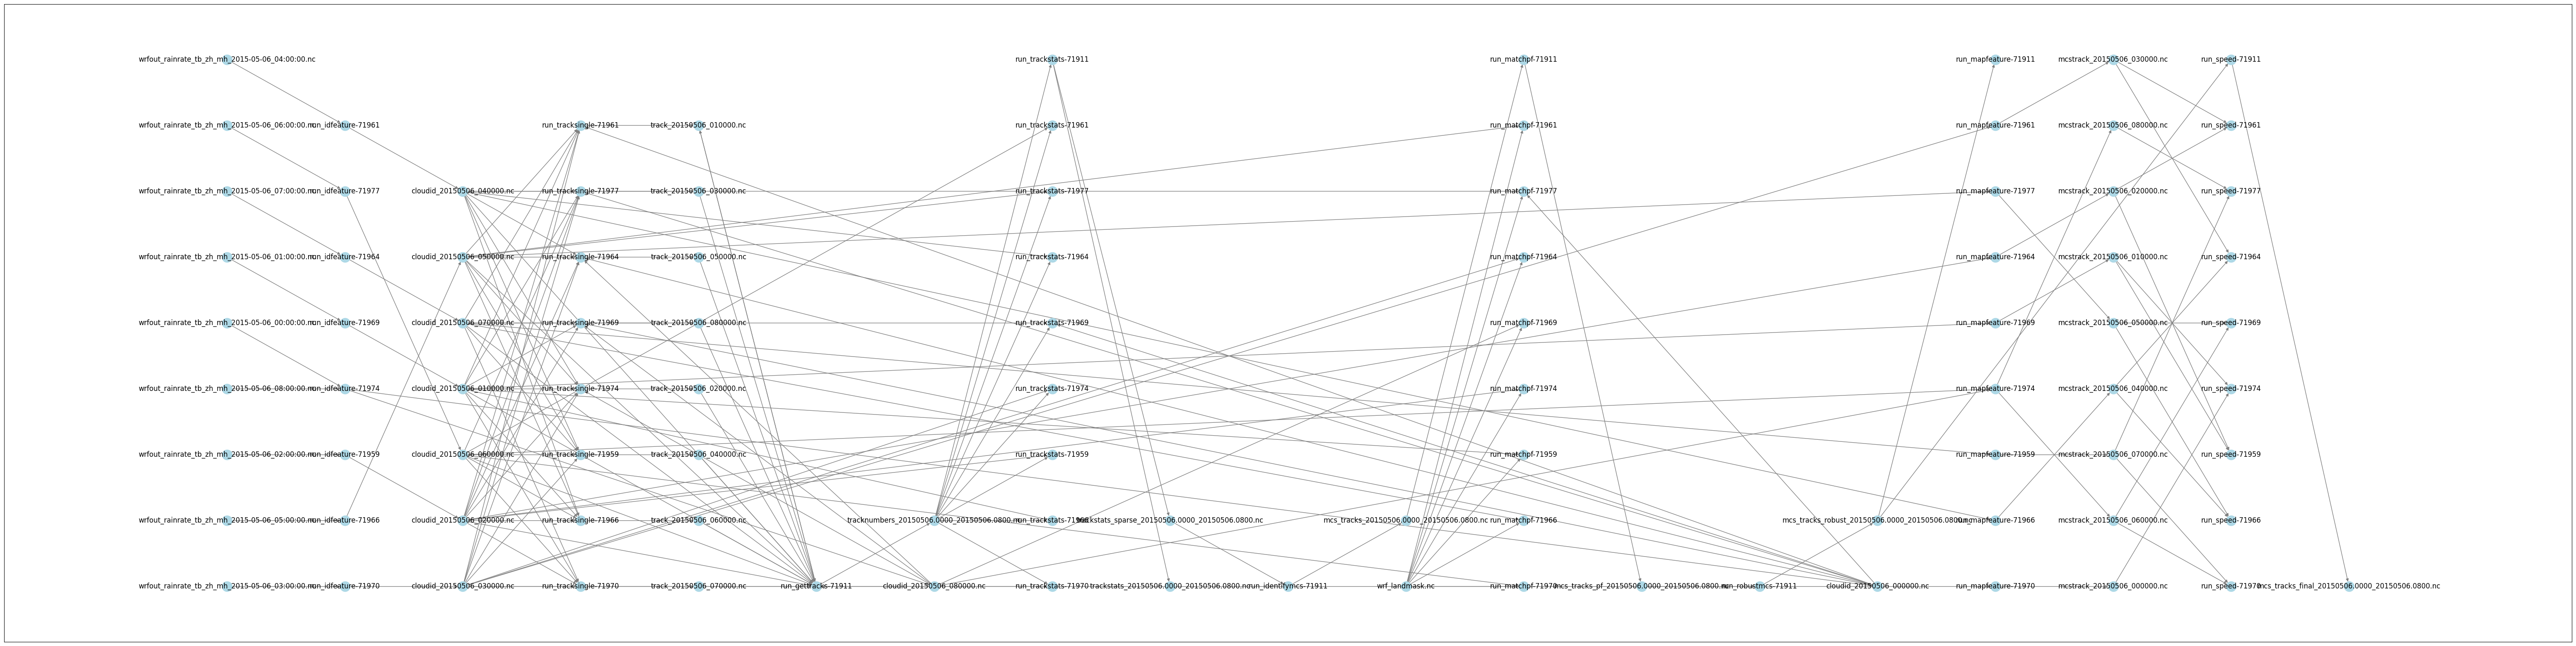

In [142]:
# sp.display_all_nodes_attr(G_VFD)
G_VFD = vfd2g.set_file_position(G_VFD, task_file_map)
# sp.display_all_nodes_attr(G_VFD)

sp.draw_graph(G_VFD, test_name, stat_path, graph_type="vfd", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)




In [143]:
vfd2g.prepare_sankey_stat(G_VFD, io_skip=VFD_IO_SKIP)

In [144]:
vfd2sk.time_to_file_x_pos(G_VFD)

All tasks:  ['run_idfeature-71970', 'run_tracksingle-71970', 'run_trackstats-71970', 'run_matchpf-71970', 'run_mapfeature-71970', 'run_speed-71970', 'run_idfeature-71966', 'run_tracksingle-71966', 'run_trackstats-71966', 'run_matchpf-71966', 'run_mapfeature-71966', 'run_speed-71966', 'run_idfeature-71959', 'run_tracksingle-71959', 'run_trackstats-71959', 'run_matchpf-71959', 'run_mapfeature-71959', 'run_speed-71959', 'run_idfeature-71974', 'run_tracksingle-71974', 'run_trackstats-71974', 'run_matchpf-71974', 'run_mapfeature-71974', 'run_speed-71974', 'run_idfeature-71969', 'run_tracksingle-71969', 'run_trackstats-71969', 'run_matchpf-71969', 'run_mapfeature-71969', 'run_speed-71969', 'run_idfeature-71964', 'run_tracksingle-71964', 'run_trackstats-71964', 'run_matchpf-71964', 'run_mapfeature-71964', 'run_speed-71964', 'run_idfeature-71977', 'run_tracksingle-71977', 'run_trackstats-71977', 'run_matchpf-71977', 'run_mapfeature-71977', 'run_speed-71977', 'run_idfeature-71961', 'run_tracksi

In [190]:
# color names : https://www.w3schools.com/colors/colors_names.asp
COLOR_MAP = {"task": "Red", # read
            "dataset": "Gold", # yellow
            "group/attr": "Yellow", # 
            "file": "MediumBlue", # blue
            "addr": "RoyalBlue", # slightly darker blue than file
            "none": "grey",
            }
EDGE_COLOR_RGBA = {
    'none' : {'r':180, 'g':180, 'b':180}, #grey for open/close/meta
    'read_only' : {'r':150, 'g':190, 'b':220},
    'write_only' : {'r':150, 'g':190, 'b':220},
    'read_write' : {'r':150, 'g':190, 'b':220}, # TODO: currently showing same as write
    'highlight' : {'r':255, 'g':128, 'b':0}, # Orange ('r':255, 'g':128, 'b':0)
    # 'read_write' : {'r':220, 'g':220, 'b':220},
}

def get_xy_position(G):
    pos_dict = nx.get_node_attributes(G,'pos')

    x_dict = {}
    y_dict = {}
    for n, pos in pos_dict.items():
        x_dict[n] = pos[0]
        y_dict[n] = pos[1]
    
    # shift x position to start from 0
    if len(x_dict.values()) == 0:
        x_base = 0.1
        xf = 1
    else:
        x_base= min(x_dict.values())
        xf=1.0/(max(x_dict.values()))
    x_dict = {k: v-x_base for k, v in x_dict.items()}
    # normalize x positions
    x_normalized = {k: v*xf for k, v in x_dict.items() }
    
    # # normalize y positions
    # yf=1.0/(max(y_dict.values()))
    # y_normalized = {k: v*yf for k, v in y_dict.items() }
    
    # Noamalize y positions between 0.1 and 1
    y_max = max(y_dict.values())
    y_min = min(y_dict.values())
    y_normalized = {k: 0.1 + 0.99 * (v - y_min) / (y_max - y_min) for k, v in y_dict.items()}
    
    # return x_dict, y_dict
    return x_normalized, y_normalized


def get_nodes_for_sankey(G, rm_tags=[],label_on=True):
    node_dict_ref = {}
    node_dict_for_sankey = {'label': [], 'color':[], 'x':[], 'y':[], 'thickness':15, 'pad':0, }
    x_pos, y_pos = get_xy_position(G)
    
    for idx, (node_name, attr) in enumerate(G.nodes(data=True)):
        # node_type = 'file' if node_name[-4:] == 'residue_100.h5' else 'task'
        # print(f"{idx}, ({node_name}, {attr})")
        
        node_type = attr['type']
        if node_name in node_dict_ref:
            print(node_name, "==duplicate==")
        node_dict_ref[node_name] = {'idx':idx, 'type':node_type}

        #sankey
        if label_on == True:  
            # node_label = node_name + f" {G.nodes[node_name]['pos']} ({x_pos[node_name]:.2f}, {y_pos[node_name]:.2f})"
            node_label = node_name
            if node_type == 'group/attr':
                # get phase number
                phase = attr['phase']
                node_label = f"File-Metadata-{phase}"
            for rm_tag in rm_tags:
                if rm_tag == "DATASETNAME":
                    if node_type == 'dataset' or node_type == 'group/attr': node_label = ""
                if rm_tag == "FILENAME":
                    if node_type == 'file': node_label = ""
                if rm_tag == "PID" and node_type == "task":
                    task_pid = node_name.split('-')[-1]
                    if "epoch" in node_name:
                        date_str = node_name.split('-')[-2]
                        node_label = node_label.replace(f"-{date_str}", "")
                        node_label = node_label + ".h5"                            
                    node_label = node_label.replace(f"-{task_pid}", "")
                else:
                    node_label = node_label.replace(rm_tag, '')
            node_dict_for_sankey['label'].append(node_label)
            
        elif label_on == "Partial":
            # print("Partial label on")
            phase = attr['phase']
            phase_order = G.nodes[node_name]['pos'][1]
            if node_type == "task":
                shorten_node = node_name.split('_')[1] # remove run_ prefix
                shorten_node = shorten_node.split('-')[0] # remote pid
            else:
                shorten_node = node_name.split('_')[0] + ".nc" 
            # node_label = f"{phase+1}-{node_type}-{phase_order}"
            node_label = shorten_node 
            node_dict_for_sankey['label'].append(node_label)
            
        node_dict_for_sankey['color'].append(COLOR_MAP[node_type])
        node_dict_for_sankey['x'].append(x_pos[node_name])
        node_dict_for_sankey['y'].append(y_pos[node_name])
        # node_dict_for_sankey['column'].append(G.nodes[node_name]['pos'][1])
        # node_dict_for_sankey['row'].append(G.nodes[node_name]['pos'][0])
    return node_dict_for_sankey, node_dict_ref

import math

def get_links_for_sankey(G, node_dict_ref, 
                         edge_attr=['access_cnt','access_size','operation','bandwidth', 'data_access_size', 'data_access_cnt', 'metadata_access_size', 'metadata_access_cnt'], 
                         rm_tags=[],val_sqrt=True, highlight=True):
    
    link_dict_for_sankey = {'source':[], 'target':[], 'value':[], 'label': [], 'color': []}
    #'hoverinfo': "all"
    #'line_width':[], # shows strokeWidth of the edges
    
    attr_cnt = nx.get_edge_attributes(G,edge_attr[0])
    attr_size = nx.get_edge_attributes(G,edge_attr[1])
    attr_op = nx.get_edge_attributes(G,edge_attr[2])
    attr_bw = nx.get_edge_attributes(G,edge_attr[3])
    attr_data_size = nx.get_edge_attributes(G,edge_attr[4])
    attr_data_cnt = nx.get_edge_attributes(G,edge_attr[5])
    attr_metadata_size = nx.get_edge_attributes(G,edge_attr[6])
    attr_metadata_cnt = nx.get_edge_attributes(G,edge_attr[7])
    
    
    # min_size = min(attr_size.values())
    
    # print(attr_dict)
    for u, v, attr in G.edges(data=True):
        # print(u, v, attr)
        u_idx = node_dict_ref[u]['idx']
        v_idx = node_dict_ref[v]['idx']
        link_dict_for_sankey['source'].append(u_idx)
        link_dict_for_sankey['target'].append(v_idx)

        cnt = attr_cnt[(u,v)]
        size = attr_size[(u,v)]
        # if val_sqrt: edge_width = math.sqrt(math.sqrt(size))  #math.sqrt(math.sqrt(size))  math.sqrt(size) 
        if val_sqrt: 
            transform_size = size * 400
            for iter in range(4):
                transform_size = math.sqrt(transform_size)
            edge_width = transform_size
                
        else: edge_width = size
        
        if cnt == 0: cnt = 1
        if size == 0: edge_width = 1
        
        op = attr_op[(u,v)]

        # get edge color based on bandwidth
        link_dict_for_sankey['value'].append(edge_width)
        # _str = f"ave_acc_size: {sp.humansize(size/cnt)} op: {op}"
        bw = attr_bw[(u,v)]
        
        ave_data_size = 0
        ave_metadata_size = 0
        
        if attr_data_cnt[(u,v)] != 0:
            ave_data_size = sp.humansize(attr_data_size[(u,v)]/attr_data_cnt[(u,v)])
        if attr_metadata_cnt[(u,v)] != 0:
            ave_metadata_size = sp.humansize(attr_metadata_size[(u,v)]/attr_metadata_cnt[(u,v)])
        
        _str = (f"Access Volume : {sp.humansize(size)} <br />"
            + f"Access Count : {cnt} <br />"
            + f"Average Access Size : {sp.humansize(size/cnt)} <br />"
            + F"HDF5 Data Access Count : {attr_data_cnt[(u,v)]} <br />"
            + f"Average HDF5 Data Access Size : {ave_data_size} <br />"
            + F"HDF5 Metadata Access Count : {attr_metadata_cnt[(u,v)]} <br />"
            + f"Average HDF5 Metadata Access Size : {ave_metadata_size} <br />"
            + f"Operation : {op}<br />"
            +f"Bandwidth : {sp.humanbw(bw)}")
        
        link_dict_for_sankey['label'].append(_str)

        # link_dict_for_sankey['color'].append(edge_color_scale(G, u, attr_bw, attr_op, bw, op, highlight)) # get the last operation
        # FIXME
        link_dict_for_sankey['color'].append("rgba(180, 180, 180, 0.8)")

        
        # link_dict_for_sankey['acc_cnt'].append(cnt)
    
    print(f"bandwidth range: {sp.humanbw(min(attr_bw.values()))} ~ {sp.humanbw(max(attr_bw.values()))}")
        
    return link_dict_for_sankey

label_on="Partial" # True False Partial

# # Remove "run_" prefix from the task name
# for node in G_VFD.nodes:
#     if "run_" in node:
#         new_node = node.replace("run_", "")
#         G_VFD = nx.relabel_nodes(G_VFD, {node: new_node})

vfd_nodes, vfd_nodes_dict = get_nodes_for_sankey(G_VFD, rm_tags=["PID"], label_on=label_on)

# print(vfd_nodes)

vfd_links = get_links_for_sankey(G_VFD, vfd_nodes_dict, val_sqrt=True)

# # Print all go.Sankey attributes
# # for each attribute, get the valid options
# for attr in dir(go.Sankey):
#     obj = getattr(go.Sankey, attr)
#     if isinstance(obj, property):
#         print(f"{attr} : {obj.fget.__doc__}")
    
if DRAW_GRAPH:

    fig = go.Figure(go.Sankey( node = vfd_nodes, link = vfd_links, orientation='h'))

    width = 5000
    height = 1000
    
    fig.update_layout(
        autosize=True, width=width, height=height, font=dict(size=42),
        margin=dict(
            l=width/100, r=width/20,
            b=height/10, t=height/100,
        ),# paper_bgcolor='rgba(0,0,0,0)',
        )
    fig.show()

    if label_on:
        save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-labeled-sankey-s{STAGE_END-STAGE_START+1}.html"
    else:
        save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-s{STAGE_END-STAGE_START+1}.html"

    fig.write_html(save_html_path)
    print(f"Sankey saved to {save_html_path}")

bandwidth range: 3.24 KB/s ~ 20.08 MB/s


Sankey saved to example_stat/s9f9p8/vfd-9s-s9f9p8-labeled-sankey-s9.html


In [ ]:
# Create a manual legend using annotations.

def add_legend_to_graph(fig,save_img=False):
    LEGEND_ITEMS = {
        "Tasks":{"color":"red", "text":"Tasks"},
        "Files":{"color":"blue", "text":"Files"},
        "Edges":{"color":"lightblue", "text":"File bandwidth, darker the color, higher the bandwidth"},
    }

    legend_items = [
        go.layout.Annotation(
            x=0.9,  # X-coordinate for legend item
            y=0.85 - i * 0.03,  # Y-coordinate for legend item (adjust for position)
            xref='paper',
            yref='paper',
            text=f"{item_type} - {LEGEND_ITEMS[item_type]['color']}",
            showarrow=False,
            font=dict(size=14, color=LEGEND_ITEMS[item_type]['color']),
            # bordercolor='grey',  # Set the border color for the legend box
            # borderwidth=1,  # Set the border width for the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Add a transparent background color
        )
        for i, item_type in enumerate(LEGEND_ITEMS.keys())
    ]
    fig.update_layout(annotations=legend_items)
    fig.show()
    if save_img:
        fig.write_html(f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-annotated.html")
